In [1]:
!pip install pymysql

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


sns.set(rc={"figure.figsize": (12, 12)})
import pandas as pd
import pymysql
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://root@localhost/imdb')

df = pd.read_sql_query('SELECT * FROM cast', engine)
df.head()



actor_id  movie_id  salary
0     16844     10920  510708
1     36641     10920   86736
2     42278     10920  853936
3    144260     10920  172612
4    204493     10920  432731

In [49]:
qry = """
SELECT
  COUNT(DISTINCT(actor_1)) AS kb,
  COUNT(DISTINCT(actor_2)) AS one,
  COUNT(DISTINCT(actor_3)) AS two,
  COUNT(DISTINCT(actor_4)) AS three
FROM 
  kb_4
"""
df = pd.read_sql_query(qry, engine)
df.head()


kb  one   two  three
0   1  597  1276   1664

In [50]:
df_t = df.transpose()
df_t.head()

0
kb        1
one     597
two    1276
three  1664

In [51]:
df_t = df_t.reset_index()

In [52]:
df_t.columns = ['degree','ct']

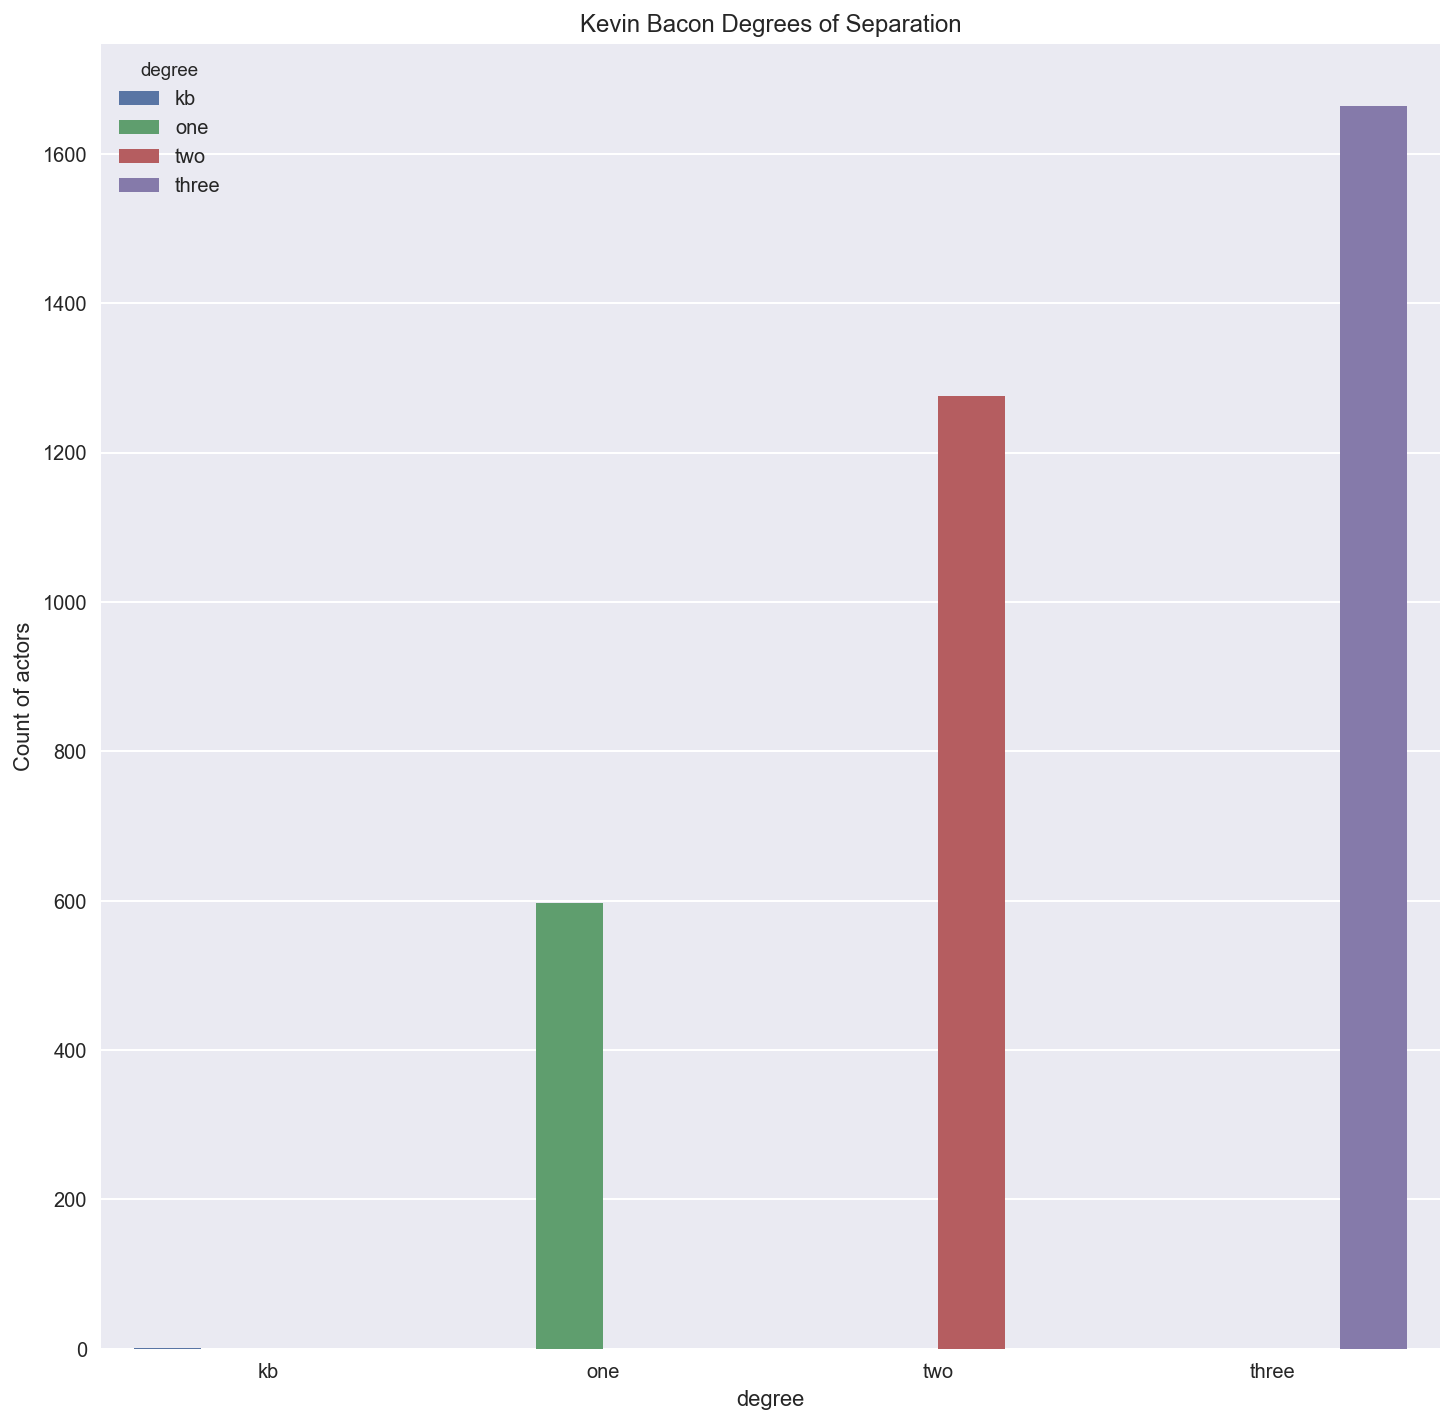

In [53]:
ax = sns.barplot(x="degree", y="ct", hue="degree", data=df_t); 

ax.set_ylabel('Count of actors')
ax.set_title('Kevin Bacon Degrees of Separation')
plt.savefig('kevin_bacon.png')


In [2]:

df = pd.read_sql_query('SELECT * FROM movies', engine)
df.head()

id          title  year     genre
0  10920         Aliens  1986    Sci-Fi
1  17173   Animal House  1978    Action
2  18979      Apollo 13  1995  Thriller
3  30959  Batman Begins  2005    Horror
4  46169     Braveheart  1995    Comedy

In [3]:

df = pd.read_sql_query('SELECT * FROM actors', engine)
df.head()

id        full_name gender
0   933  Lewis Abernathy      M
1  2547   Andrew Adamson      M
2  2700     William Addy      M
3  2898      Seth Adkins      M
4  2925    Charles Adler      M

In [4]:

avg_sal_genre = pd.read_sql_query('SELECT AVG(salary) AS salary, genre FROM cast left join movies on cast.movie_id = movies.id GROUP BY genre;', engine)
avg_sal_genre.head()

salary      genre
0  507475.8898     Action
1  506814.6296  Adventure
2  500732.4588     Comedy
3  498439.9231      Crime
4  520888.9036      Drama

In [5]:
import seaborn as sns

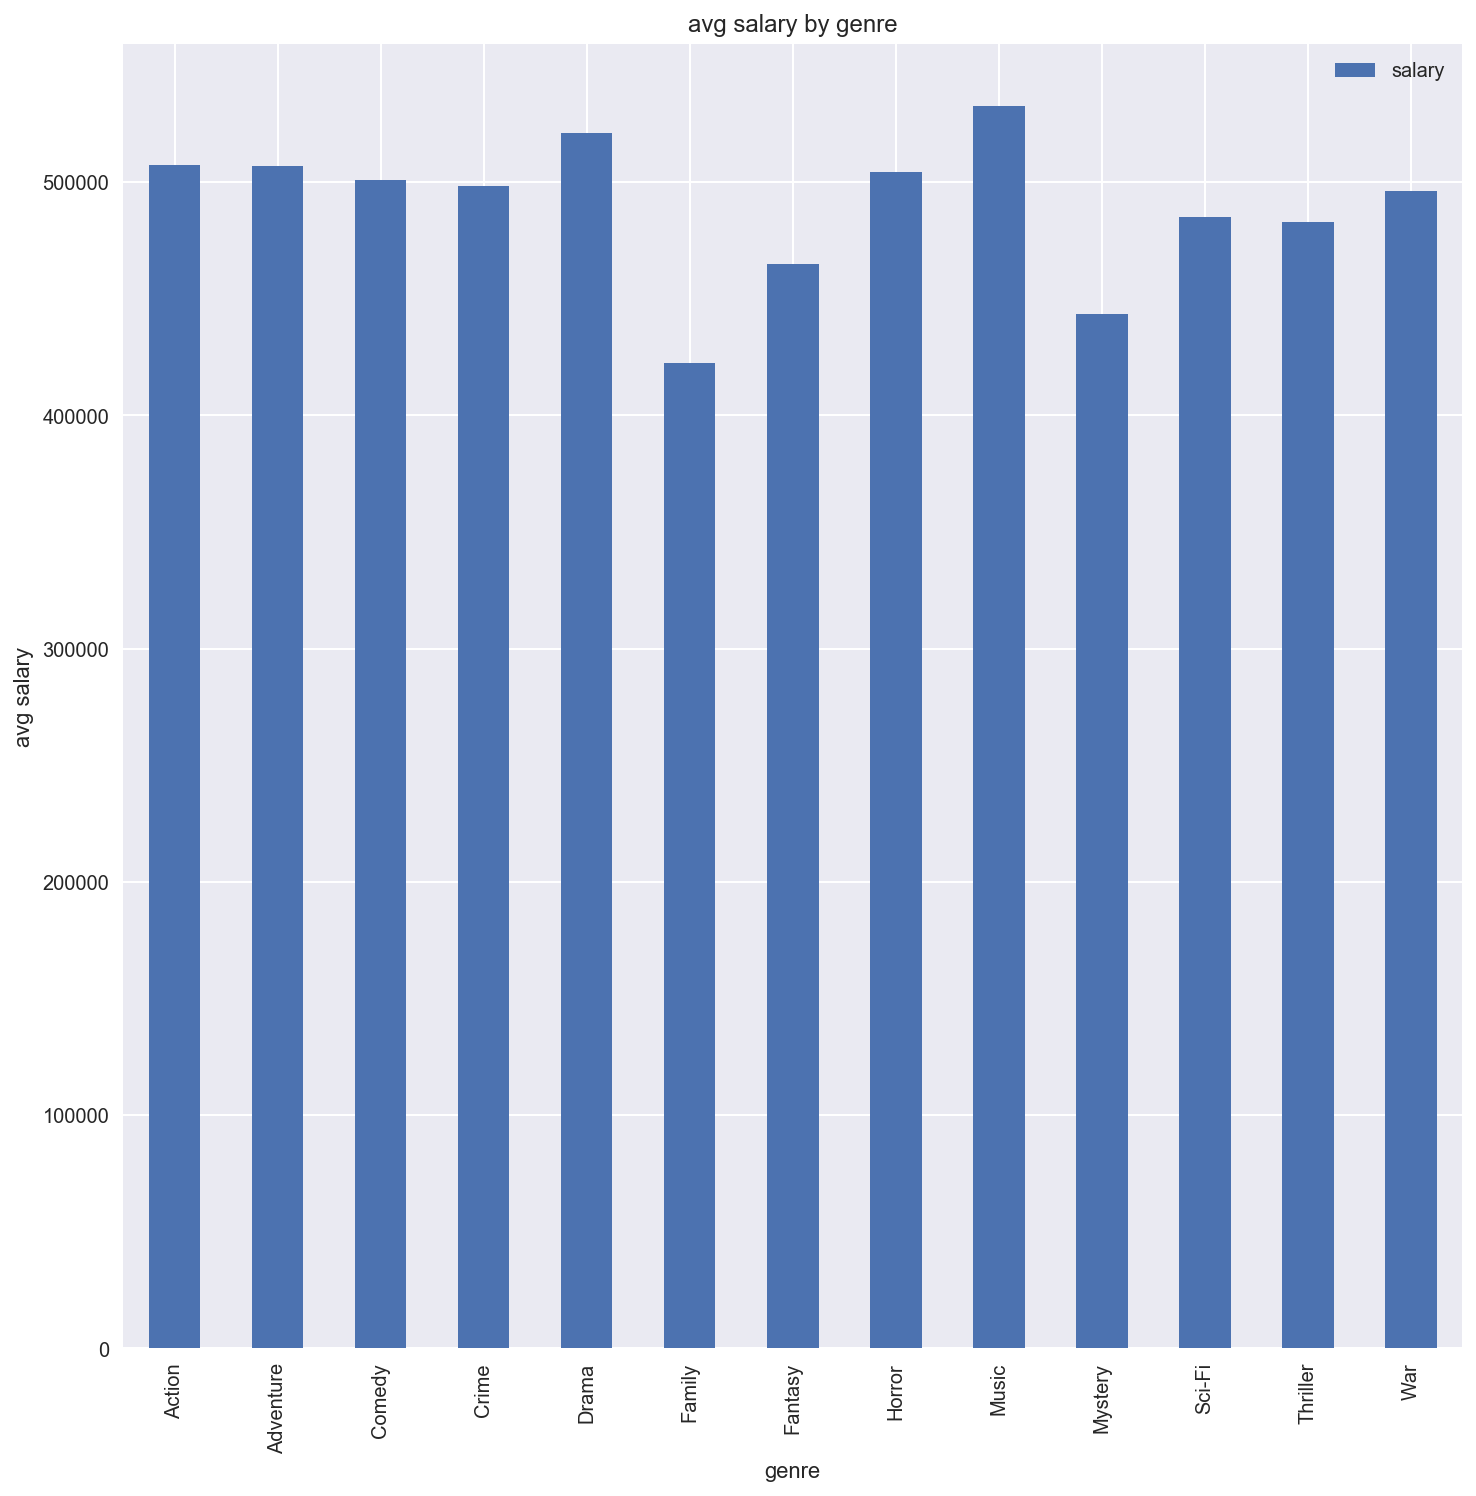

In [6]:
ax = avg_sal_genre.set_index('genre').plot(kind = 'bar', title = 'avg salary by genre')
ax.set_ylabel("avg salary")

In [102]:

avg_sal_year = pd.read_sql_query('SELECT AVG(salary) AS salary, year FROM cast left join movies on cast.movie_id = movies.id GROUP BY year;', engine)
avg_sal_year.head()

salary  year
0  506814.6296  1972
1  499830.0865  1977
2  436563.6047  1978
3  495593.4839  1983
4  464736.3846  1984

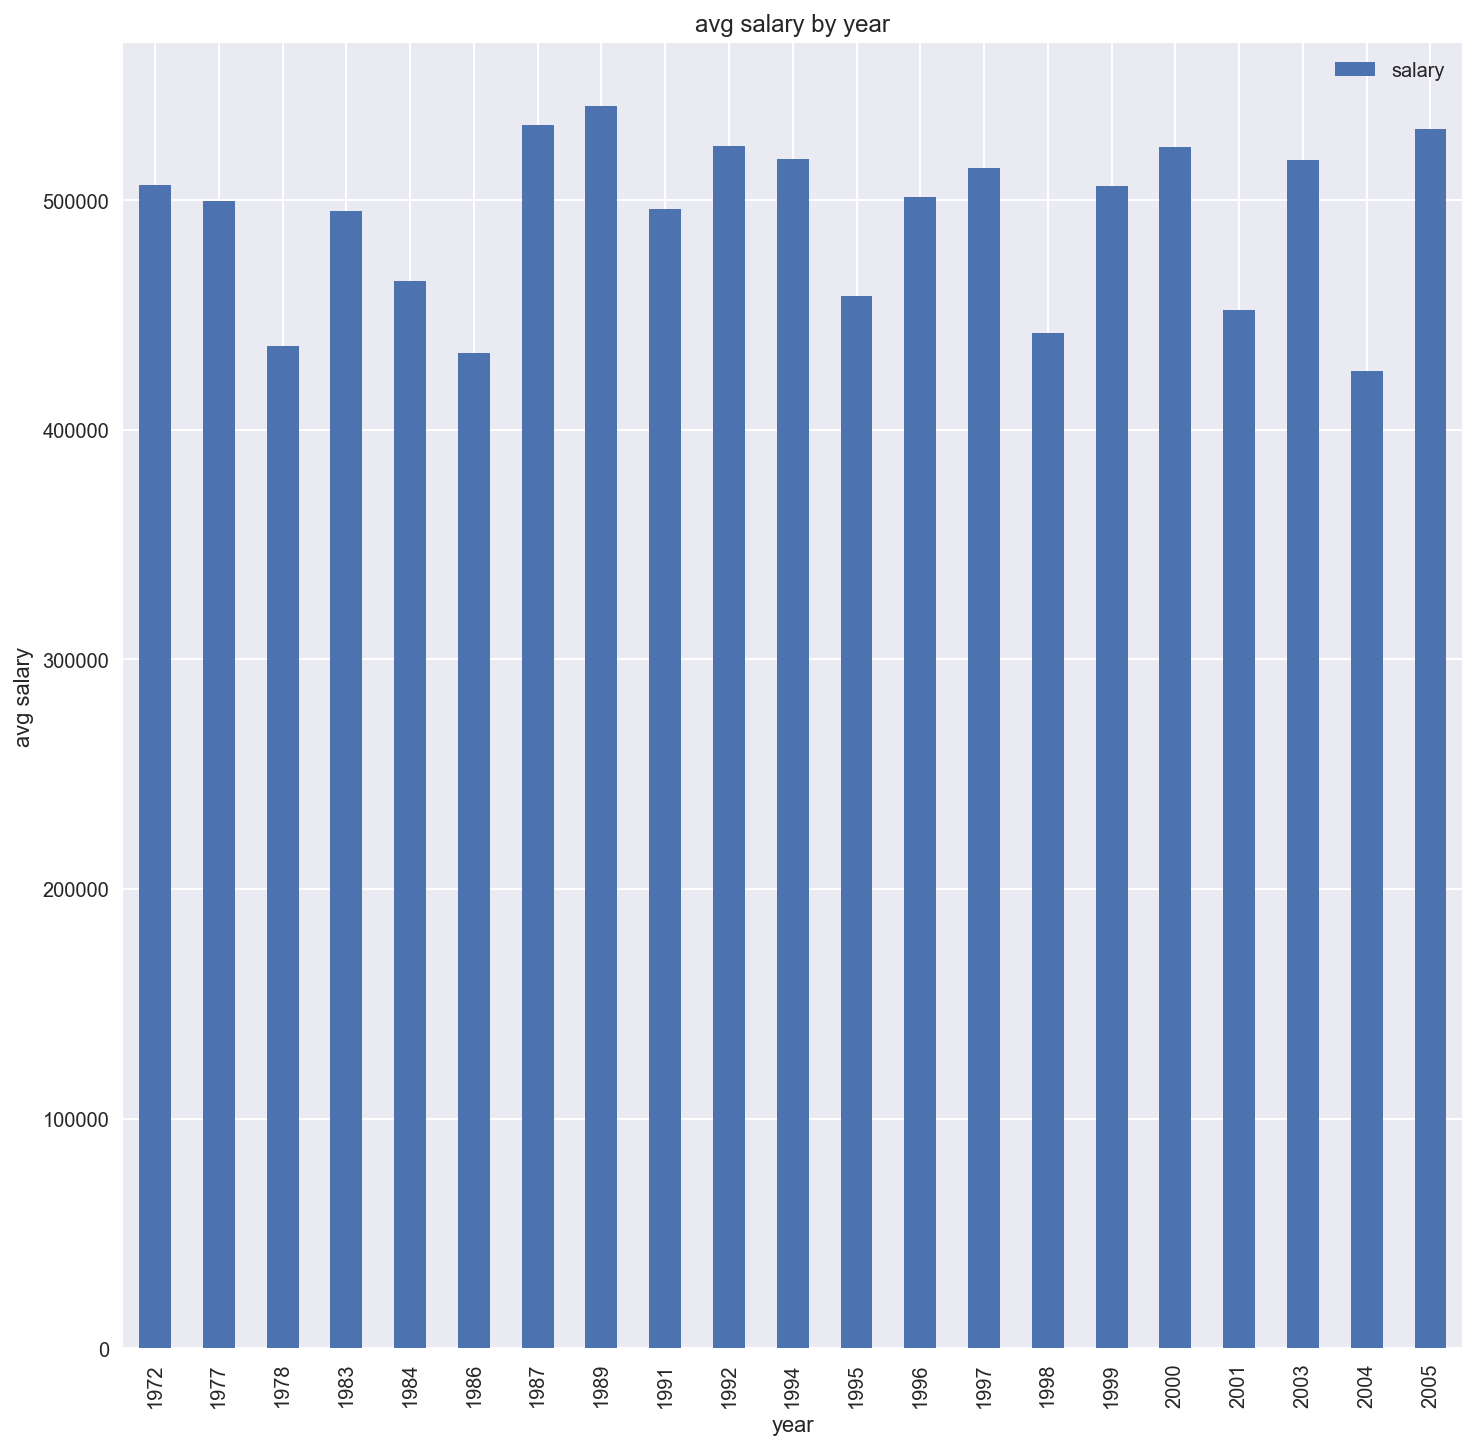

In [107]:
ax = avg_sal_year.set_index('year').plot(kind = 'bar', title = 'avg salary by year')
ax.set_ylabel("avg salary")

In [117]:

avg_sal_actor = pd.read_sql_query('SELECT AVG(salary) AS salary, full_name, gender FROM cast left join actors on cast.actor_id = actors.id GROUP BY full_name,gender;', engine)
avg_sal_actor.head()

salary           full_name gender
0  639843.0        .D. Brickman      M
1  958562.0      A. Ray Ratliff      M
2  263355.0    Aaron James Cash      M
3  817895.0        Aaron Sorkin      M
4  534918.0  Abdul Blackmanwest      M

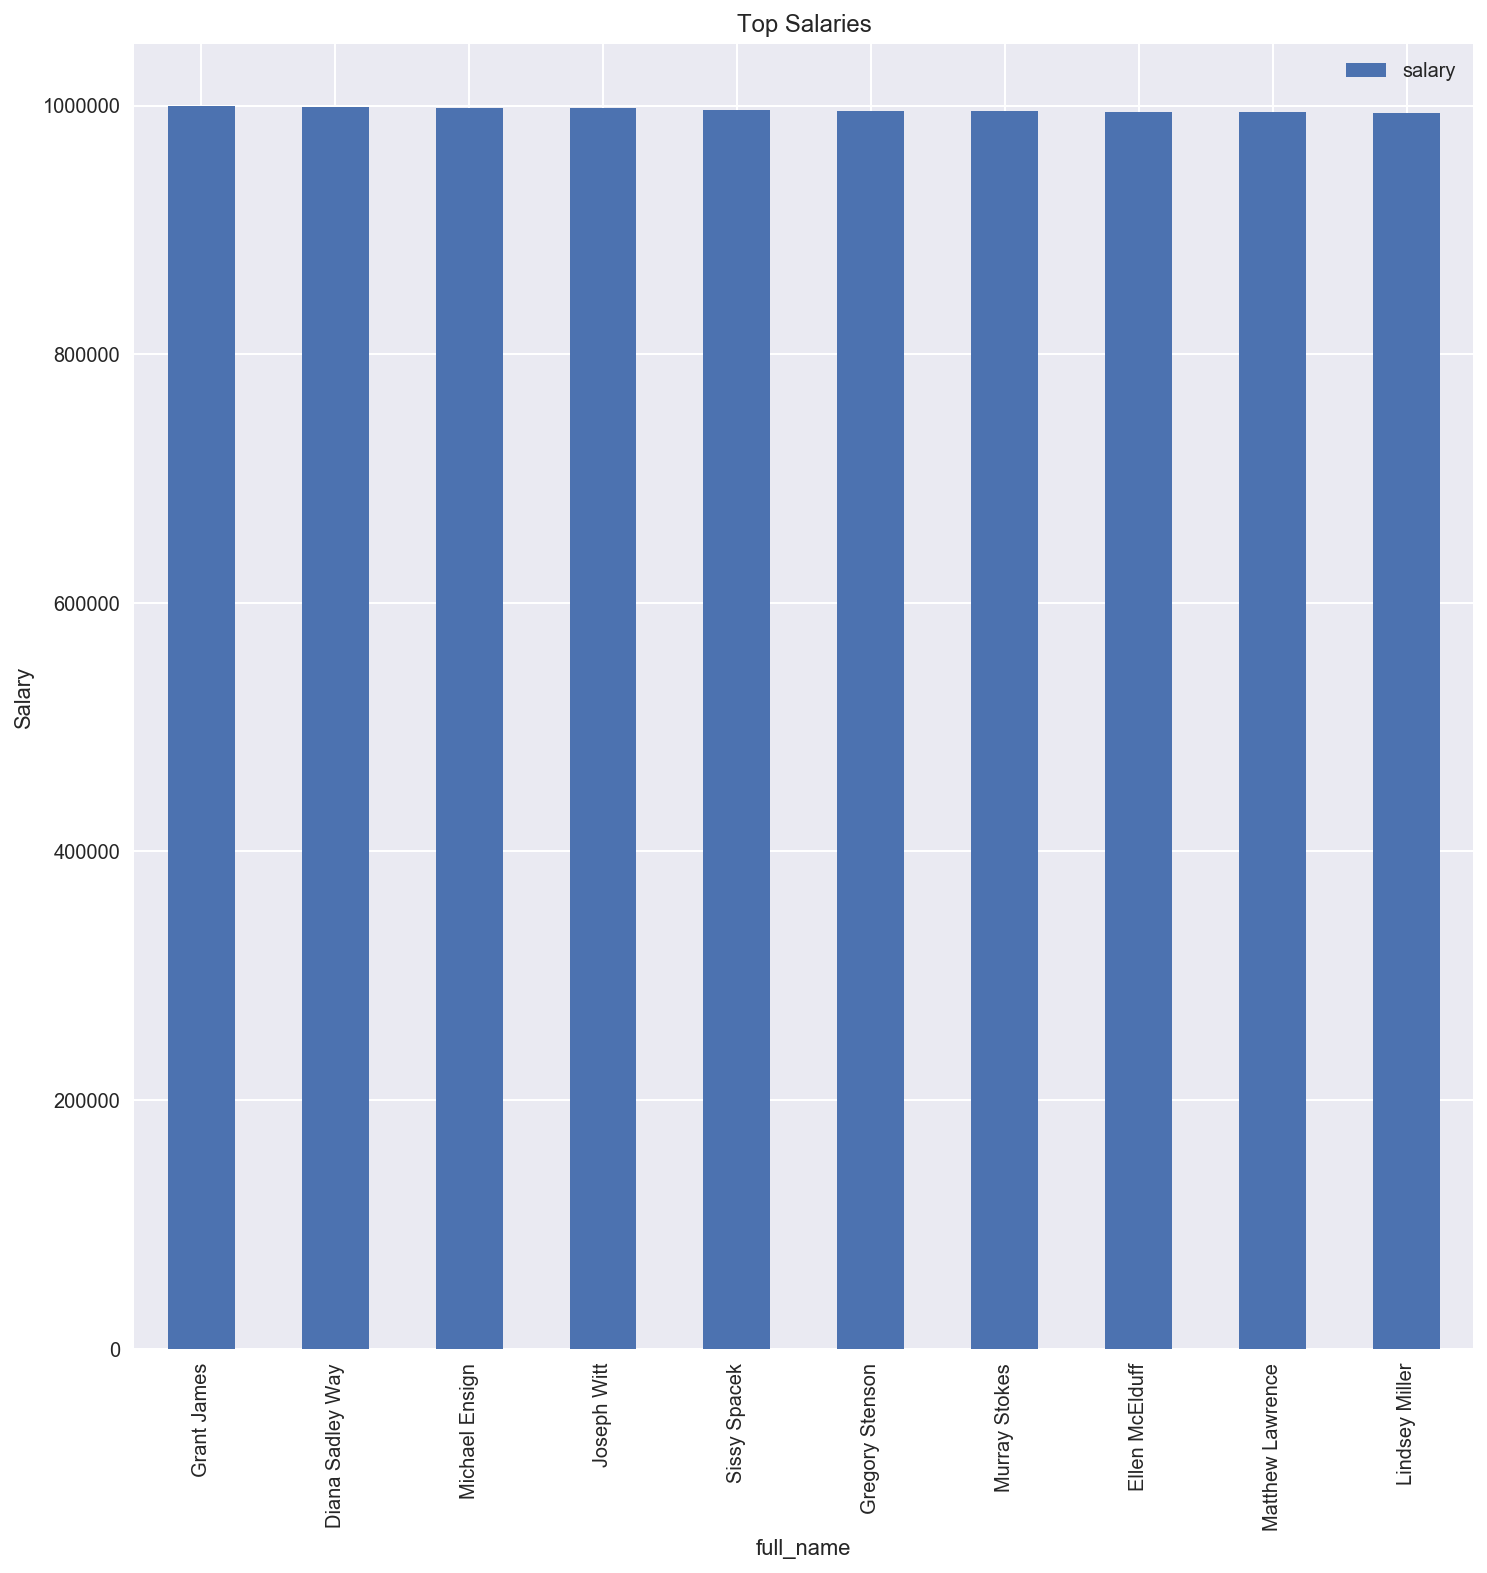

In [145]:
ax = pd.DataFrame(avg_sal_actor.groupby('full_name').sum().salary).sort_values('salary', ascending = False).head(10).plot(kind = 'bar')

ax.set_ylabel('Salary')
ax.set_title('Top Salaries')

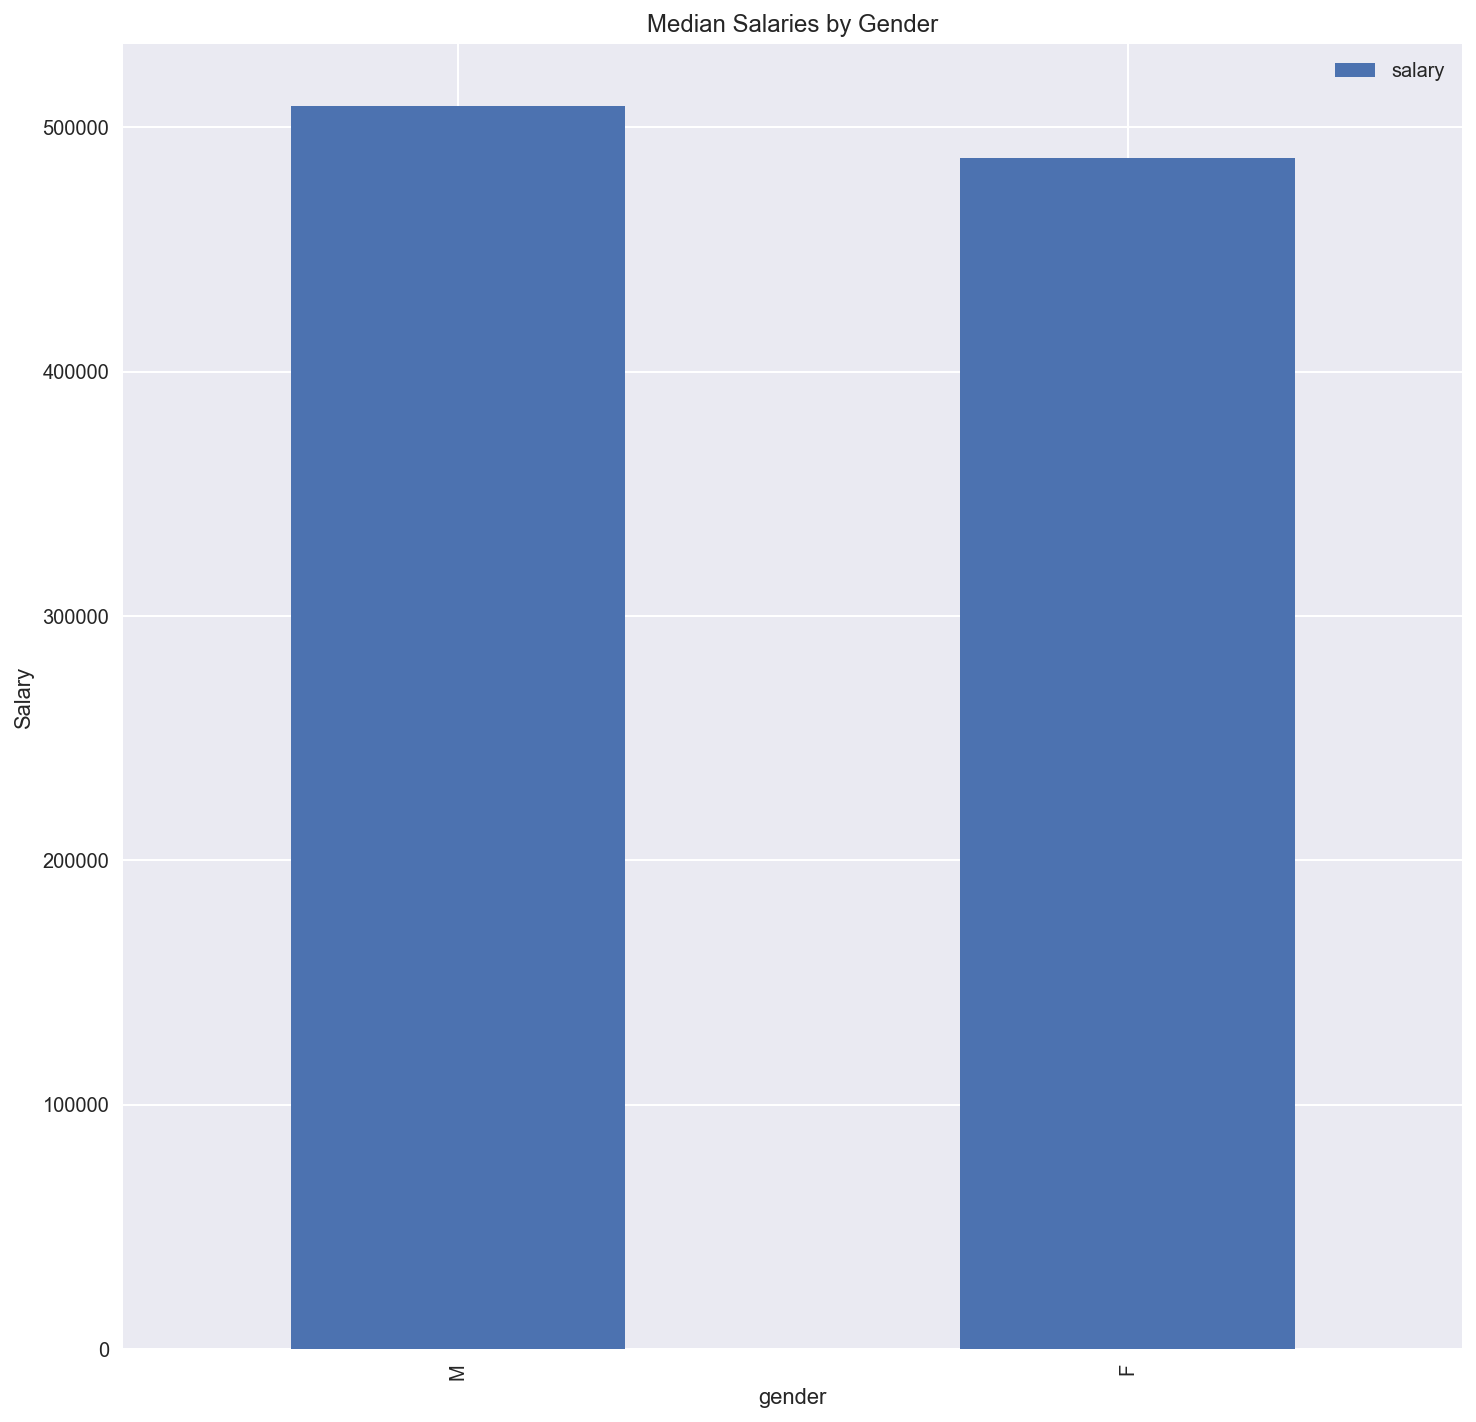

In [150]:

ax = pd.DataFrame(avg_sal_actor.groupby('gender').median().salary).sort_values('salary', ascending = False).head(10).plot(kind = 'bar')

ax.set_ylabel('Salary')
ax.set_title('Median Salaries by Gender')

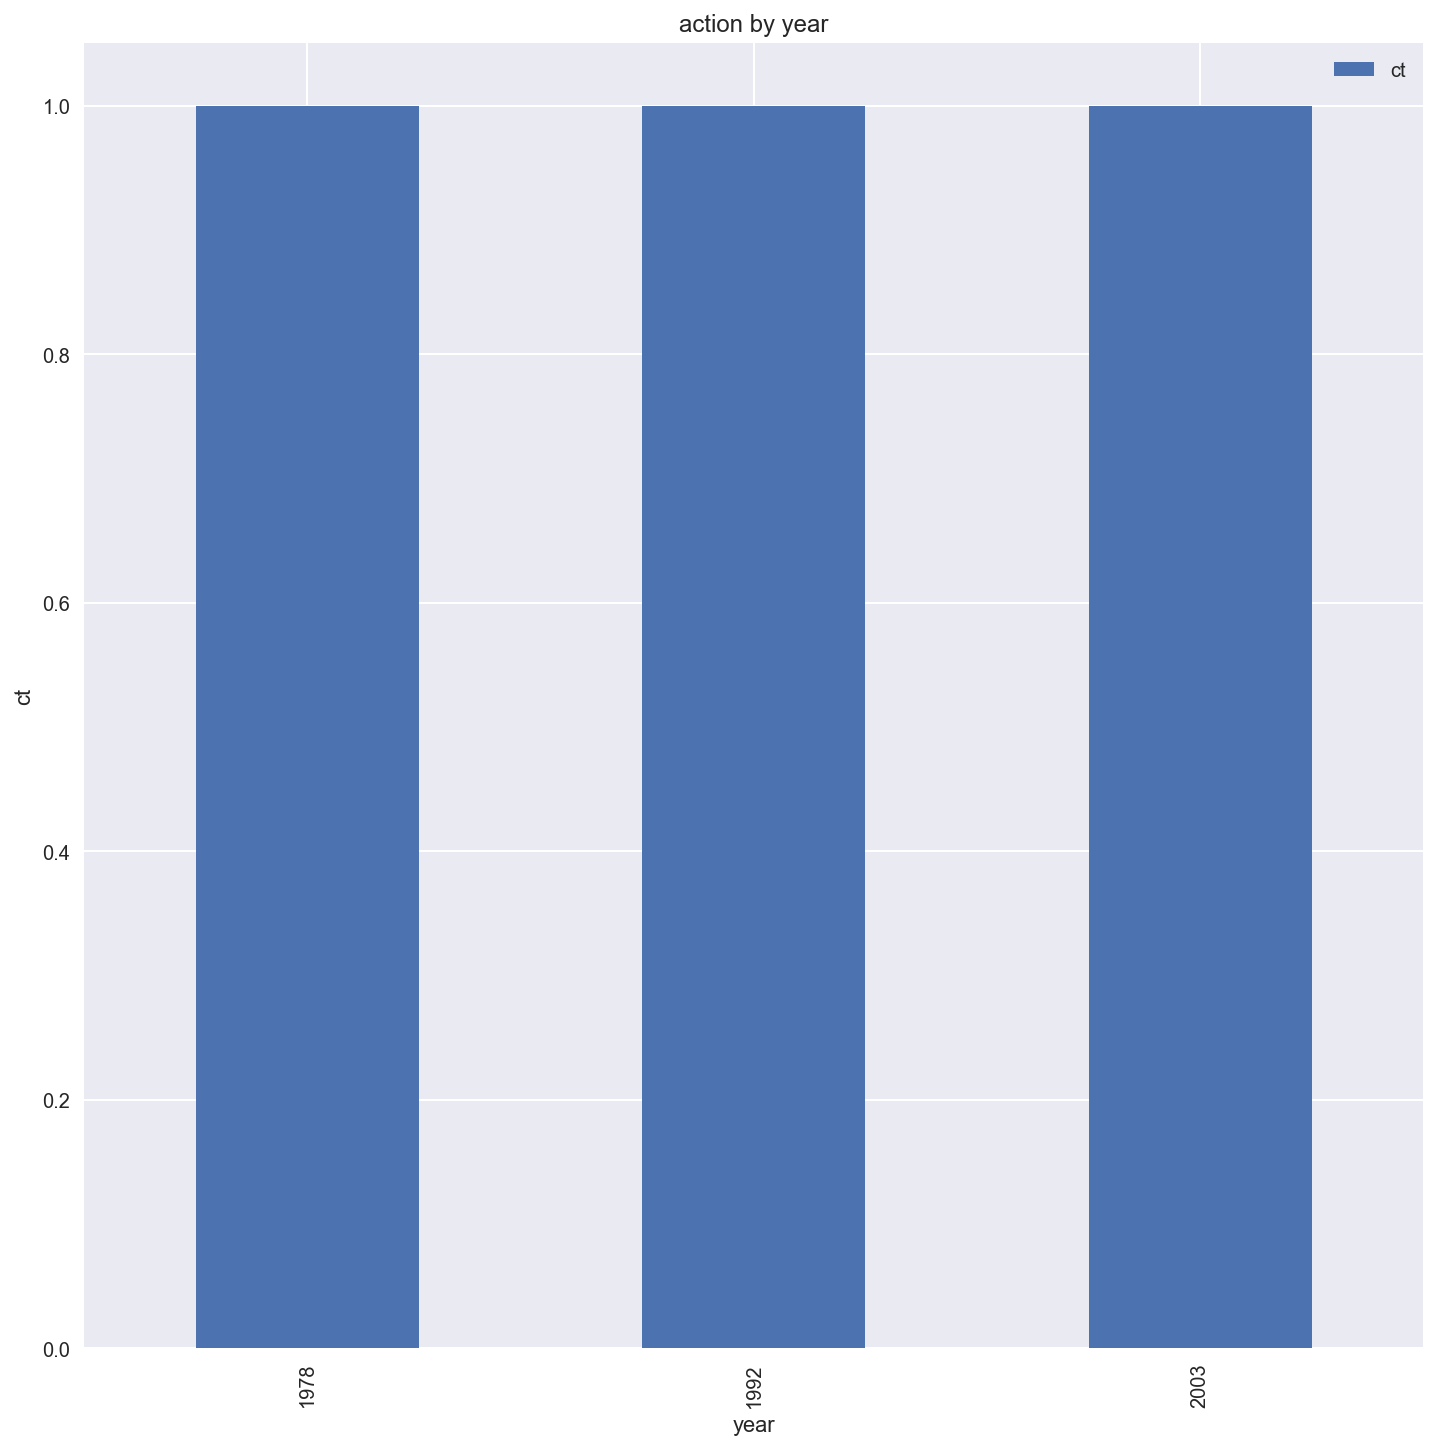

In [24]:
# six degrees of kevin bacon

avg_sal_actor = pd.read_sql_query("select count(*) AS ct, genre, year  FROM movies WHERE genre = 'Action'group by genre, year;", engine)
avg_sal_actor.head()

ax = avg_sal_actor.set_index('year').plot(kind = 'bar')


ax.set_ylabel('ct')
ax.set_title('action by year')
plt.savefig('action_year.png')


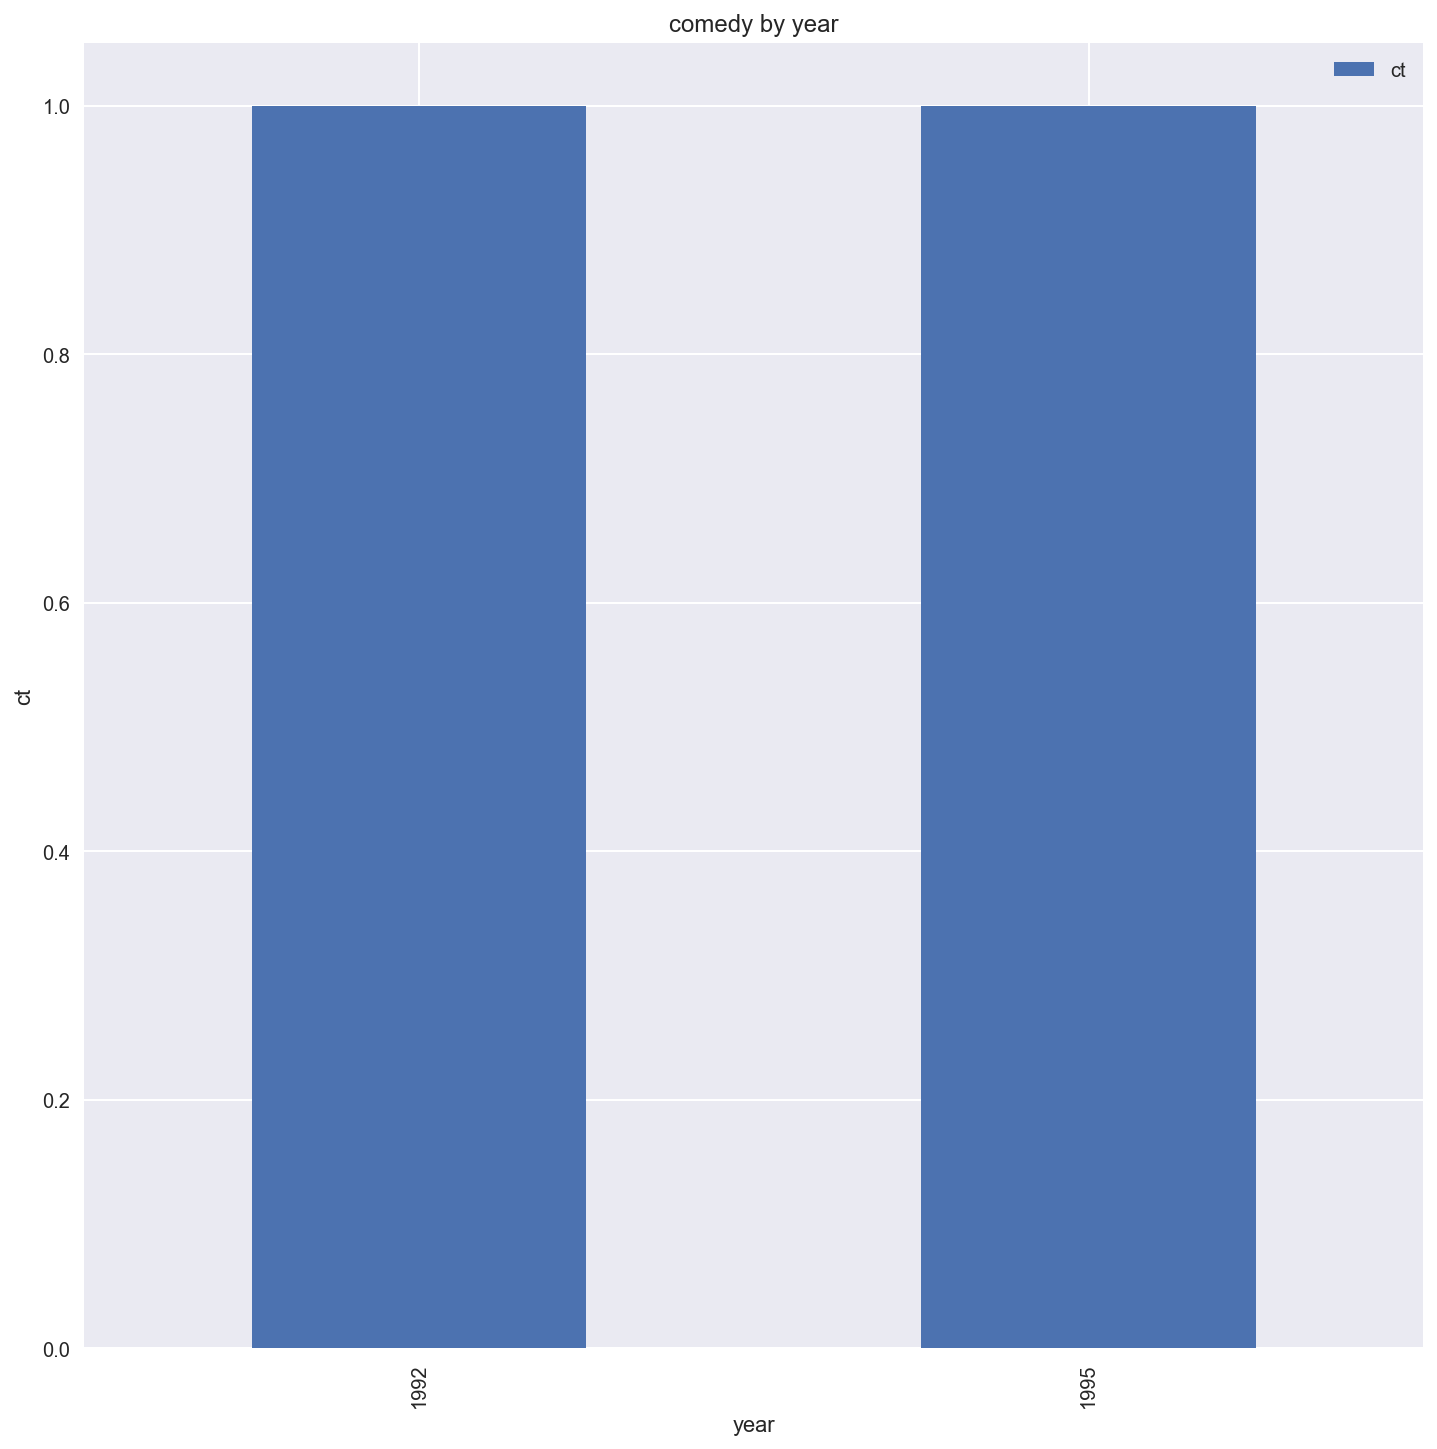

In [25]:
# six degrees of kevin bacon

avg_sal_actor = pd.read_sql_query("select count(*) AS ct, genre, year  FROM movies WHERE genre = 'Comedy'group by genre, year;", engine)
avg_sal_actor.head()

ax = avg_sal_actor.set_index('year').plot(kind = 'bar')


ax.set_ylabel('ct')
ax.set_title('comedy by year')
plt.savefig('comedy_year')


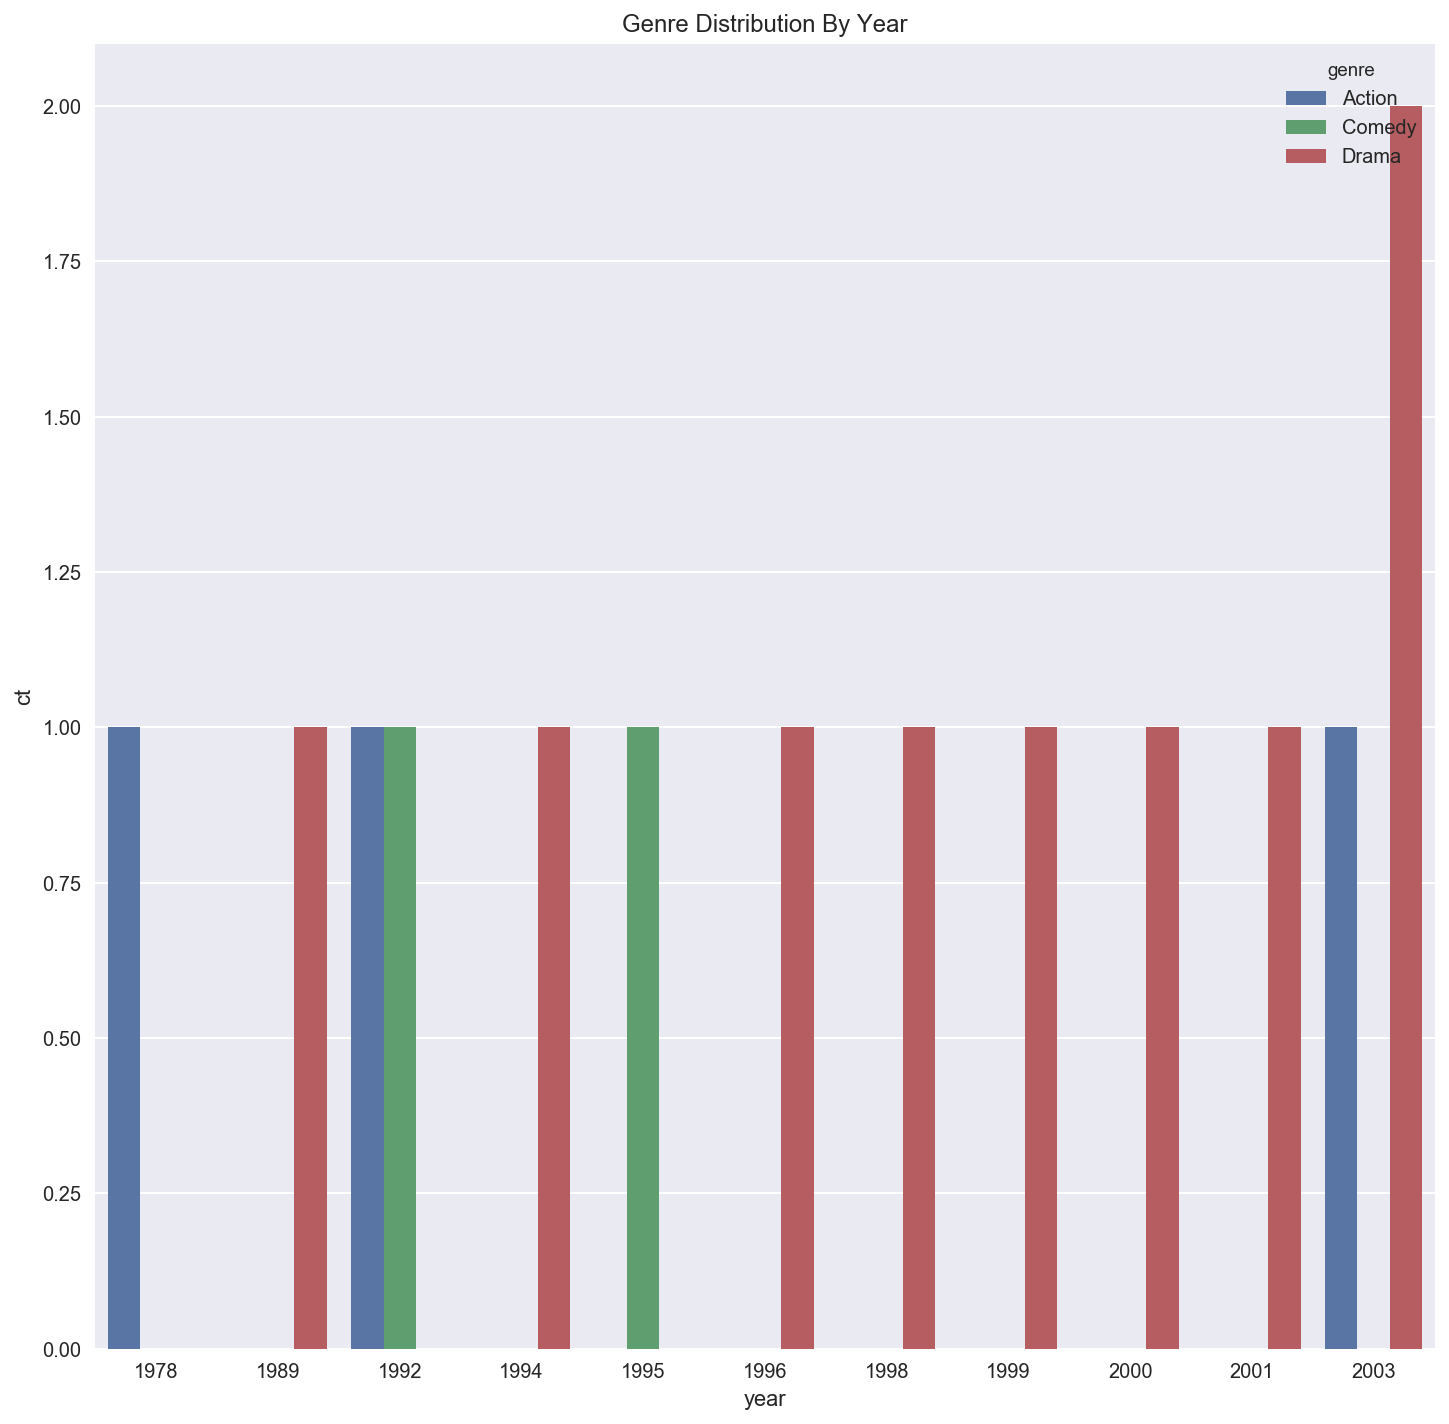

In [14]:
# six degrees of kevin bacon

genre_year = pd.read_sql_query("select count(*) AS ct, genre, year  FROM movies WHERE genre = 'Drama' or genre = 'Comedy' or genre = 'Action' group by genre, year;", engine)
genre_year.head()

ax = sns.barplot(x="year", y="ct", hue="genre", data=genre_year); 


ax.set_ylabel('ct')
ax.set_title('Genre Distribution By Year')
plt.savefig('genre_year.png')
